<h1 style='color:purple' align='center'>Customer Buying Behavior prediction</h1>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


<h2 style='color:blue'>Part 1: convert text columns into number using LabelEncoder</h2>

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in df.select_dtypes('object'):
    df[col]= le.fit_transform(df[col])
    
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int32  
 2   trip_type              50000 non-null  int32  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int32  
 7   route                  50000 non-null  int32  
 8   booking_origin         50000 non-null  int32  
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int32(5), int64(8)
memory usage: 4.4 MB

<h2 style='color:blue'>imbalance dataset</h2>

In [6]:
df.	booking_complete.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [7]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,0.112360,1.987620,84.940480,23.04456,9.06634,3.069860,391.905800,38.263340,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,0.315812,0.129873,90.451378,33.88767,5.41266,2.029833,227.297259,32.756539,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,0.000000,2.000000,21.000000,5.00000,5.00000,1.000000,203.000000,4.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,0.000000,2.000000,51.000000,17.00000,9.00000,3.000000,381.000000,37.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,0.000000,2.000000,115.000000,28.00000,13.00000,5.000000,611.000000,57.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,1.000000,2.000000,867.000000,778.00000,23.00000,6.000000,798.000000,103.000000,1.000000,1.000000,1.000000,9.500000,1.000000


<h2 style='color:blue'>feature selection</h2>

In [8]:
x= df.drop(columns = ['booking_complete'])
y = df['booking_complete']

In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

booking_complete
0    42522
1    42522
Name: count, dtype: int64

In [10]:
from sklearn.feature_selection import mutual_info_classif
score = mutual_info_classif(x_sm, y_sm)
info = pd.Series(score)
info.index = x_sm.columns
info.sort_values(ascending= False)

flight_duration          0.180817
booking_origin           0.126198
route                    0.120077
length_of_stay           0.036839
sales_channel            0.020404
wants_in_flight_meals    0.017329
flight_day               0.015490
trip_type                0.011176
wants_preferred_seat     0.009973
wants_extra_baggage      0.008856
flight_hour              0.007859
num_passengers           0.006695
purchase_lead            0.004809
dtype: float64

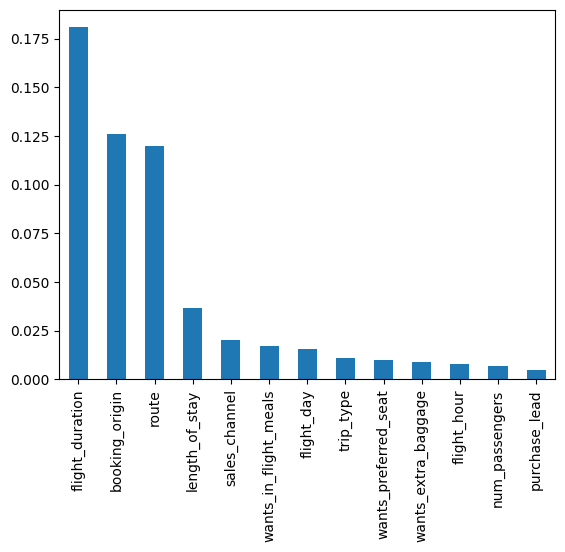

In [13]:
info.sort_values(ascending= False).plot.bar()
plt.savefig("./prominent_feature.png")

<h2 style='color:blue'>parameters correlation matrix</h2>

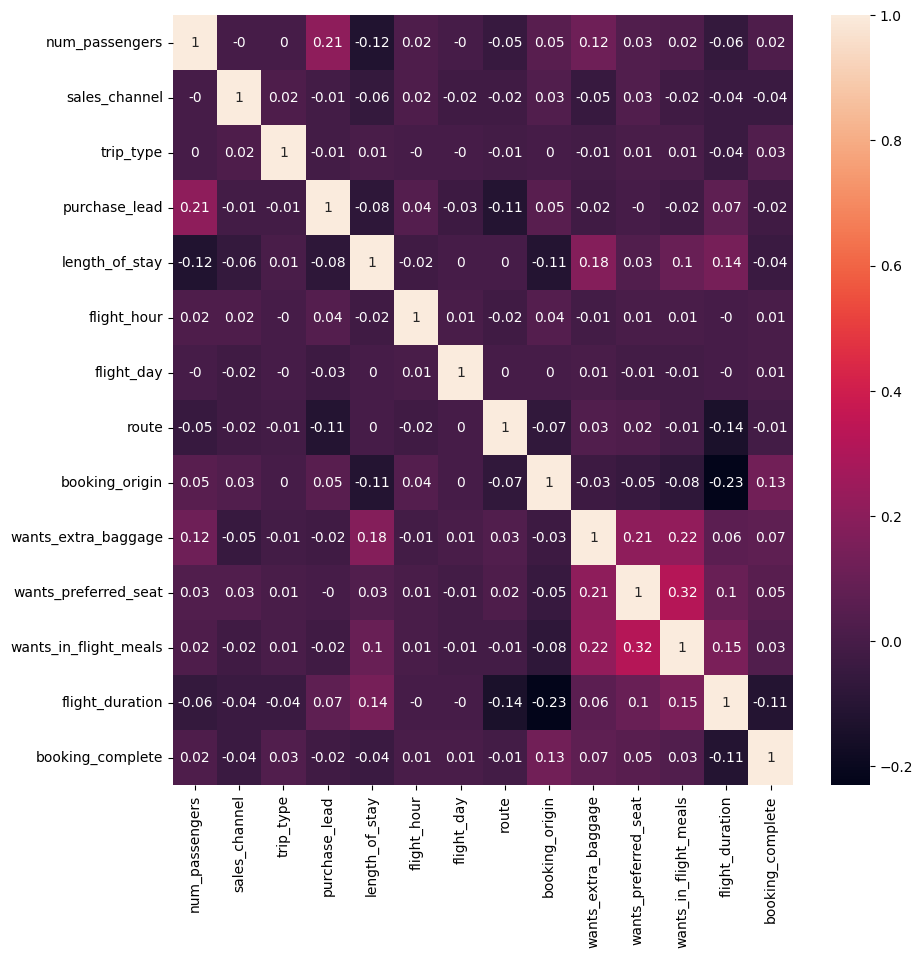

In [14]:
import matplotlib.pyplot as plt
import seaborn as sn
corr=df.corr().round(2)
plt.figure(figsize=(10,10))
sn.heatmap(corr,annot=True)
plt.savefig("./parametre_correlation.png")

<h2 style='color:blue'>train the model using top 6 features</h2>

In [15]:
x=df[["route","wants_extra_baggage","flight_duration","length_of_stay","booking_origin","trip_type"]]
y=df["booking_complete"]

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

booking_complete
0    42522
1    42522
Name: count, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [19]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
model.score(x_test,y_test)

0.8180375095537656

<h2 style='color:blue'>train the model using all the features</h2>

In [21]:
x=df.drop("booking_complete",axis="columns")
y=df["booking_complete"]

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

booking_complete
0    42522
1    42522
Name: count, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [25]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [26]:
model.score(x_test,y_test)

0.8779469692515727

In [27]:
y_pred = model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      8505
           1       0.87      0.89      0.88      8504

    accuracy                           0.88     17009
   macro avg       0.88      0.88      0.88     17009
weighted avg       0.88      0.88      0.88     17009



In [28]:
import seaborn as sn
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[7333, 1172],
       [ 904, 7600]])>

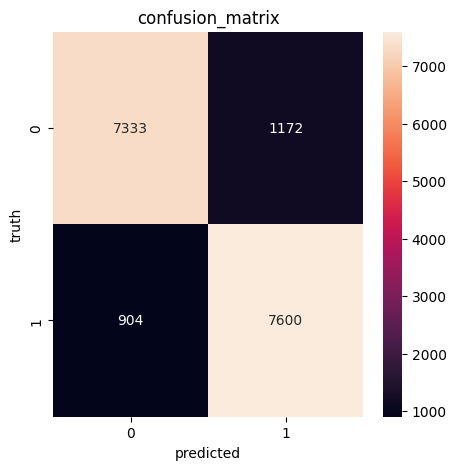

In [29]:
plt.figure(figsize=(5,5))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')
plt.title("confusion_matrix")
plt.savefig("confusion_matrix")

<h2 style='color:blue'>Part 2 : convert text columns into numbers using one hot encoding</h2>

In [30]:
df1 = pd.get_dummies(data=df, columns=['sales_channel','trip_type','flight_day','route','booking_origin'])
df1.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_0,...,booking_origin_94,booking_origin_95,booking_origin_96,booking_origin_97,booking_origin_98,booking_origin_99,booking_origin_100,booking_origin_101,booking_origin_102,booking_origin_103
0,2,262,19,7,1,0,0,5.52,0,True,...,False,False,False,False,False,False,False,False,False,False
1,1,112,20,3,0,0,0,5.52,0,True,...,False,False,False,False,False,False,False,False,False,False
2,2,243,22,17,1,1,0,5.52,0,True,...,False,False,False,False,False,False,False,False,False,False
3,1,96,31,4,0,0,1,5.52,0,True,...,False,False,False,False,False,False,False,False,False,False
4,2,68,22,15,1,0,1,5.52,0,True,...,False,False,False,False,False,False,False,False,False,False


In [31]:
x=df1.drop("booking_complete",axis="columns")
y=df1["booking_complete"]

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

booking_complete
0    42522
1    42522
Name: count, dtype: int64

In [33]:
from sklearn.feature_selection import mutual_info_classif
score = mutual_info_classif(x_sm, y_sm)
info = pd.Series(score)
info.index = x_sm.columns
p=info.sort_values(ascending= False)

<h2 style='color:blue'>feature selection</h2>

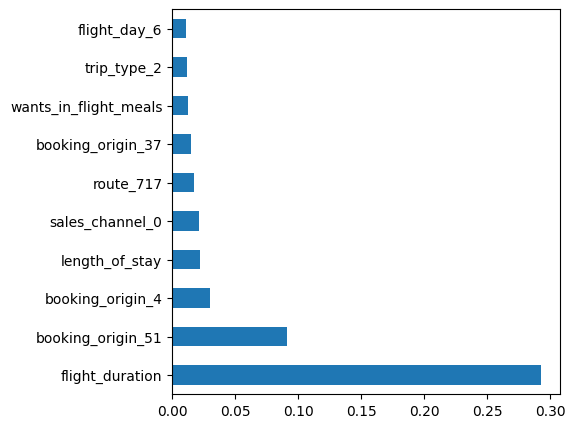

In [34]:
s=p.head(10)
plt.figure(dpi=100,figsize=(5,5))
s.plot.barh()
plt.savefig("./feature.png")

<h2 style='color:blue'>train the model using all the features</h2>

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [38]:
y_train.value_counts()

booking_complete
1    34018
0    34017
Name: count, dtype: int64

In [39]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
model.score(x_test,y_test)

0.9178670115821036

In [41]:
y_pred = model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      8505
           1       0.95      0.88      0.91      8504

    accuracy                           0.92     17009
   macro avg       0.92      0.92      0.92     17009
weighted avg       0.92      0.92      0.92     17009



In [42]:
import seaborn as sn
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[8138,  367],
       [1030, 7474]])>

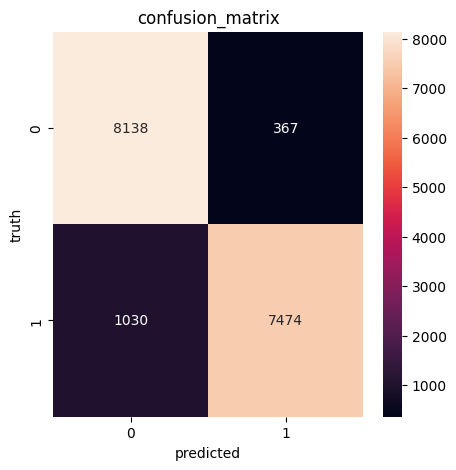

In [43]:
plt.figure(figsize=(5,5))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')
plt.title("confusion_matrix")
plt.savefig("confusion_matrix")